In [1]:
import pandas as pd
data = pd.read_csv("/home/leong/Desktop/breast cancer/breast-cancer-wisconsin-data_data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.isnull().sum()

In [4]:
data.drop(columns= "Unnamed: 32", inplace= True)

In [ ]:
data.isnull().sum()

Exploration

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/tmp/ipykernel_15684/859685735.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


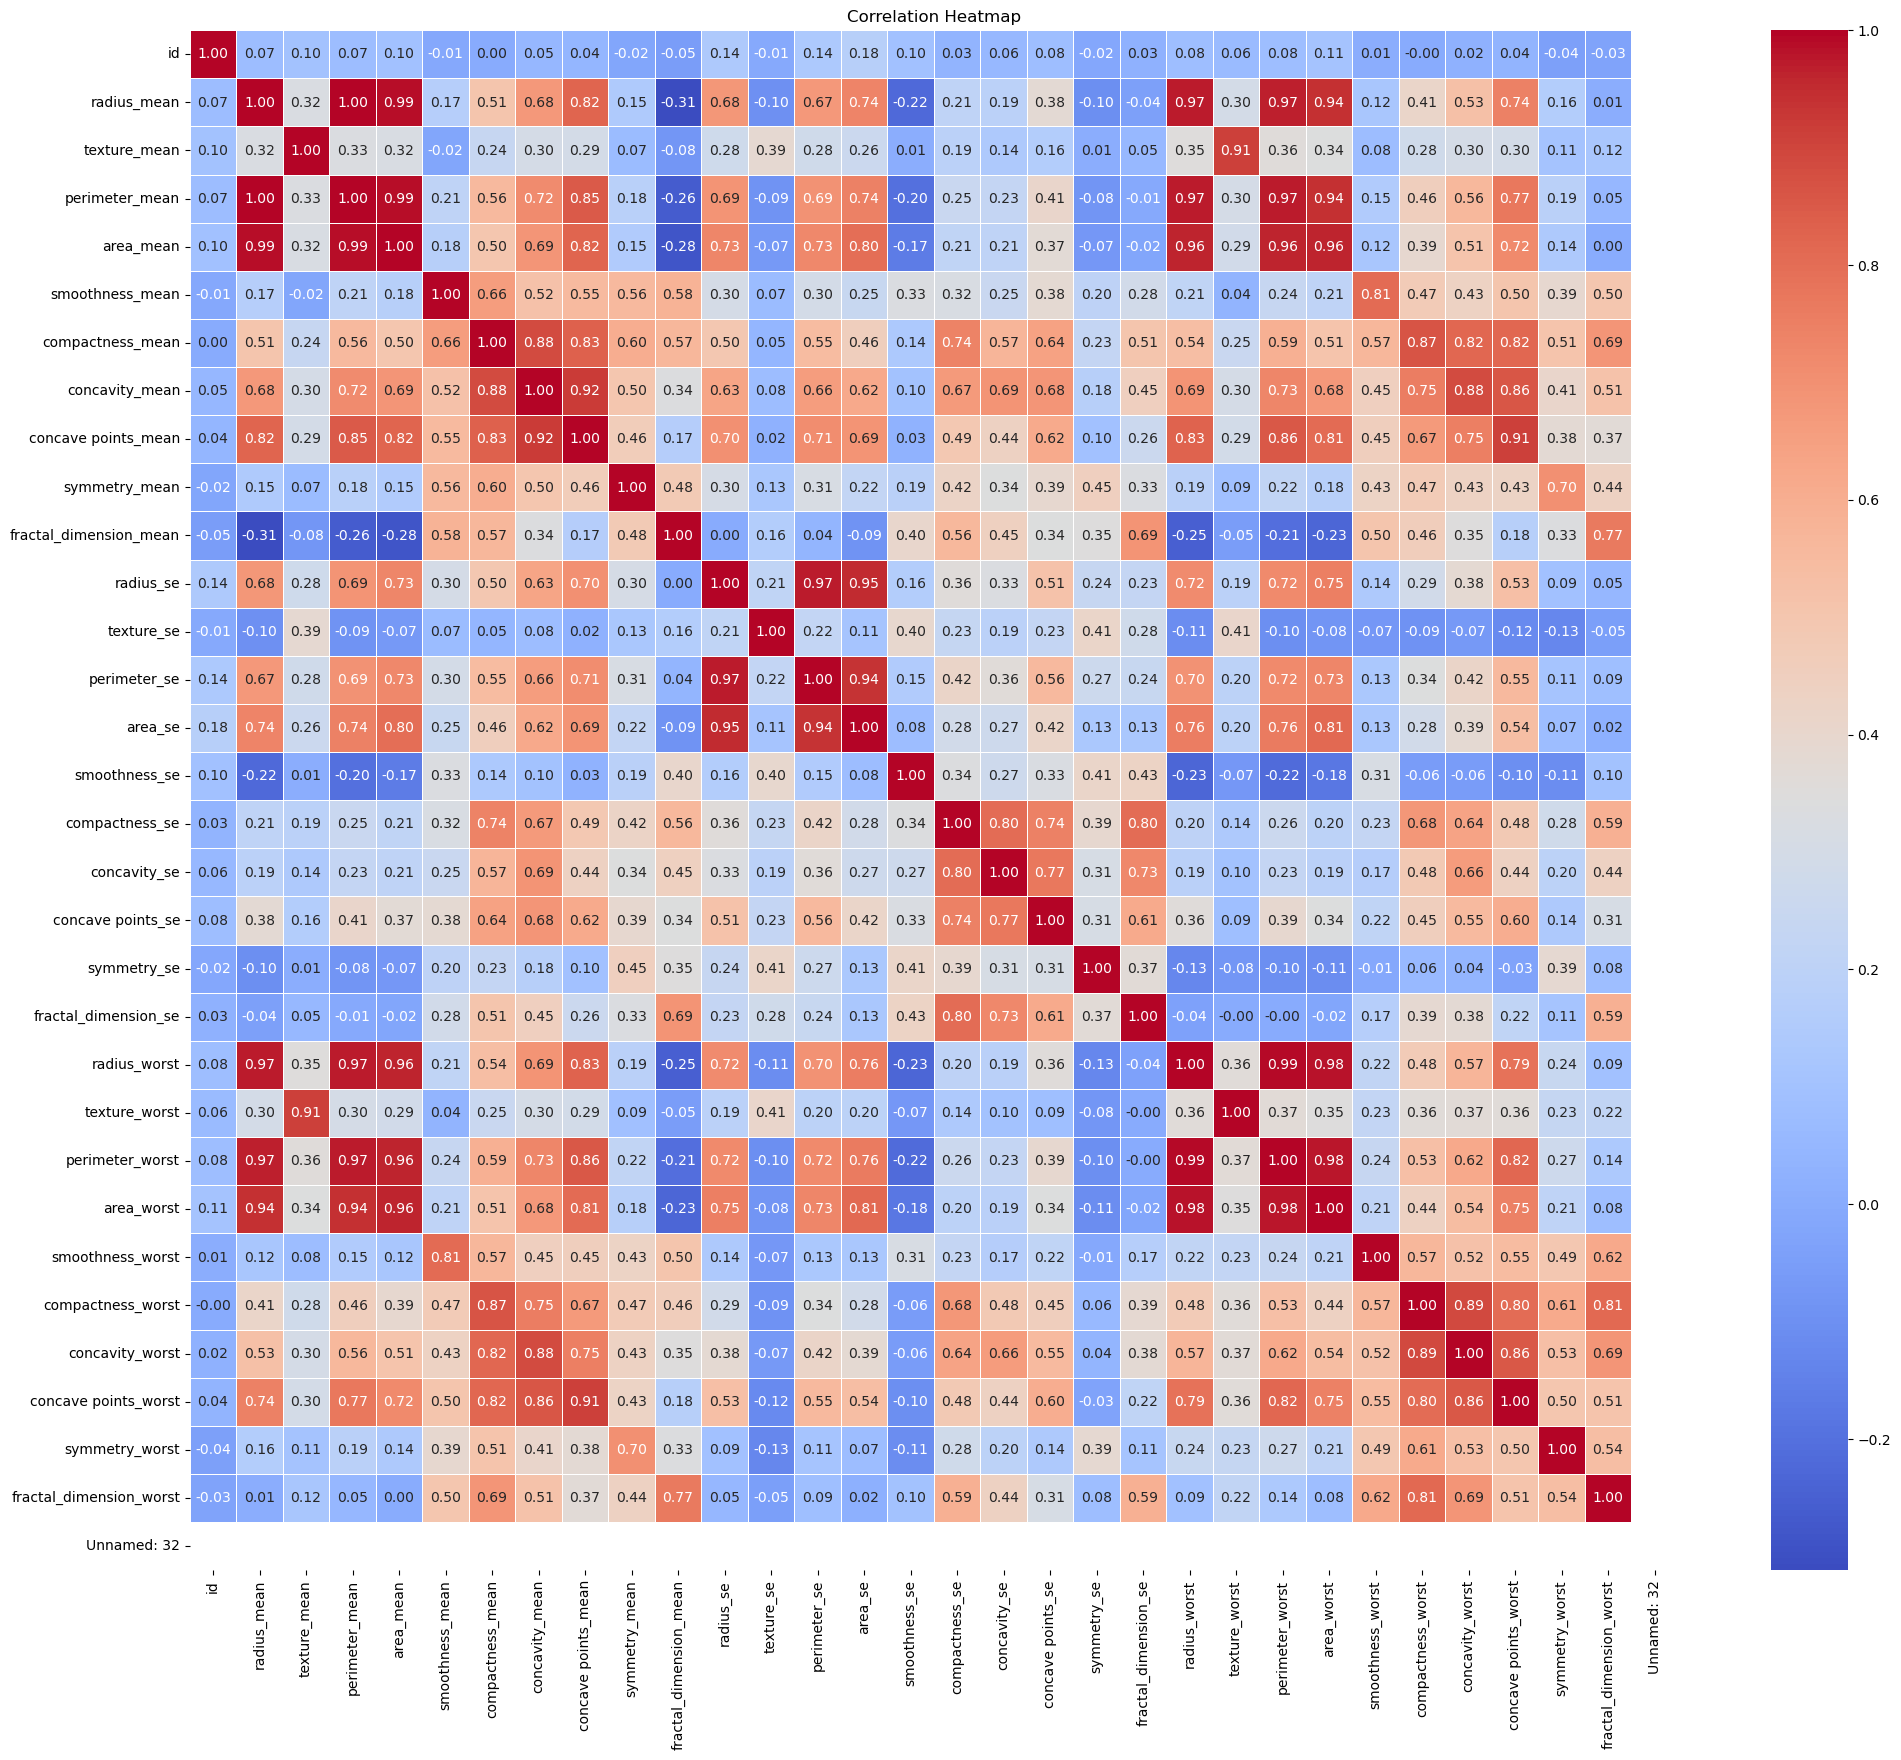

In [2]:
#plot heatmap of correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#visualizing the columns with diagnosis as the target variable 
data_for_pairplot = data.drop(columns=['id'])
data_for_pairplot['diagnosis'] = data['diagnosis']

# Create pair plot
sns.pairplot(data_for_pairplot, hue='diagnosis', palette='viridis')
plt.show()

In [ ]:
#plot diagnosis against radius, texture and area means

sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'area_mean'])


In [ ]:
#plotting compactness_worst against fractal_dimension_se
x = data['compactness_worst']
y = data['fractal_dimension_se']

plt.plot(x, y)
plt.xlabel("compactness_worst")
plt.ylabel("fractal_dimension_se")
plt.title("plotting these two together")
plt.show()

Doing a comparative analysis

In [5]:
# Comparative analysis
# Calculate the mean of 'radius_mean' for each diagnosis category
mean_radius_by_diagnosis = data.groupby('diagnosis')['radius_mean'].mean()
mean_radius_by_diagnosis

diagnosis
B    12.146524
M    17.462830
Name: radius_mean, dtype: float64

Building two models and evaluating which one is best for this dataset. Logistic regressions and random forest

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

target_variable = 'diagnosis'

#selecting column except 'id', 'diagnosis', and 'Unnamed: 32' using slicing and negative indexing
features = data.columns[2:-1]



In [9]:
# Creating column matrix X and target vector y
X = data[features]

# Convert diagnosis to binary labels. M as 1 and B as 0
y = data[target_variable].map({'M': 1, 'B': 0})  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardizing columns 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [11]:
#Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_regression_model.predict(X_test_scaled)

#evaluate model
print("Logistic Regression:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_logistic))
print('Classification Report:')
print(classification_report(y_test, y_pred_logistic))



Logistic Regression:
Accuracy: 0.9737
Confusion Matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [12]:
# Train Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate Random Forest model
print("\nRandom Forest:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_random_forest):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_random_forest))
print('Classification Report:')
print(classification_report(y_test, y_pred_random_forest))



Random Forest:
Accuracy: 0.9649
Confusion Matrix:
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Plot confusion matrices

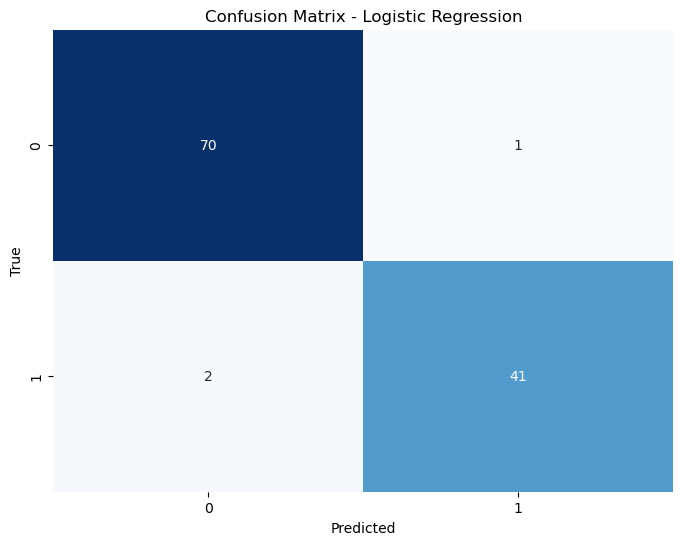

In [13]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



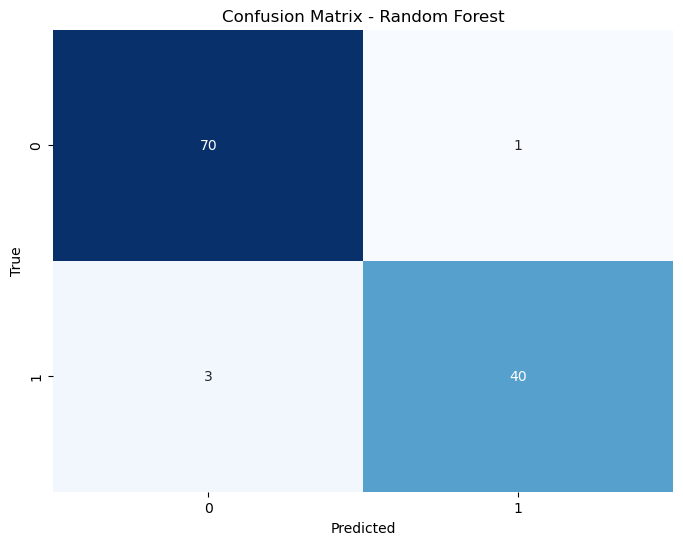

In [14]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_random_forest), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()